In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df_gender = pd.read_csv('D:\Imam\Belajar\Python\Data_Science\Gender, Age, and Emotion Detection from Voice\cleaned_gender.csv', sep =',')

In [3]:
df_gender

,Unnamed: 0,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,66,0.13,0.07,0.11,0.09,0.20,0.11,3.04,13.69,0.93,...,0.13,0.12,0.05,0.28,0.82,0.00,4.69,4.69,0.08,male
1,84,0.14,0.06,0.11,0.09,0.20,0.11,2.81,12.78,0.91,...,0.14,0.11,0.05,0.28,1.31,0.00,6.05,6.05,0.14,male
2,85,0.14,0.07,0.11,0.09,0.20,0.11,2.38,9.94,0.94,...,0.14,0.12,0.05,0.28,0.59,0.00,6.54,6.54,0.10,male
3,87,0.13,0.07,0.11,0.08,0.20,0.12,1.90,7.80,0.96,...,0.13,0.12,0.05,0.28,0.42,0.00,5.81,5.81,0.08,male
4,88,0.13,0.07,0.11,0.08,0.20,0.12,1.82,8.56,0.97,...,0.13,0.11,0.05,0.28,0.20,0.00,1.08,1.08,0.13,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,6220,0.24,0.04,0.25,0.23,0.27,0.04,2.73,11.47,0.85,...,0.24,0.18,0.05,0.28,1.22,0.00,6.14,6.14,0.09,female
4357,6222,0.24,0.05,0.25,0.23,0.26,0.03,2.87,12.01,0.86,...,0.24,0.12,0.05,0.27,1.10,0.00,10.38,10.38,0.06,male
4358,6224,0.23,0.05,0.25,0.22,0.27,0.04,3.28,15.20,0.86,...,0.23,0.16,0.05,0.28,1.30,0.19,11.81,11.62,0.08,female
4359,6230,0.24,0.04,0.25,0.23,0.27,0.03,2.83,11.35,0.85,...,0.24,0.13,0.05,0.27,0.53,0.00,3.19,3.19,0.07,male


In [4]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4361 non-null   int64  
 1   meanfreq    4361 non-null   float64
 2   sd          4361 non-null   float64
 3   median      4361 non-null   float64
 4   Q25         4361 non-null   float64
 5   Q75         4361 non-null   float64
 6   IQR         4361 non-null   float64
 7   skew        4361 non-null   float64
 8   kurt        4361 non-null   float64
 9   sp.ent      4361 non-null   float64
 10  sfm         4361 non-null   float64
 11  mode        4361 non-null   float64
 12  centroid    4361 non-null   float64
 13  meanfun     4361 non-null   float64
 14  minfun      4361 non-null   float64
 15  maxfun      4361 non-null   float64
 16  meandom     4361 non-null   float64
 17  mindom      4361 non-null   float64
 18  maxdom      4361 non-null   float64
 19  dfrange     4361 non-null  

In [5]:
df_gender.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df_gender.drop(['mindom'], axis = 1, inplace = True)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

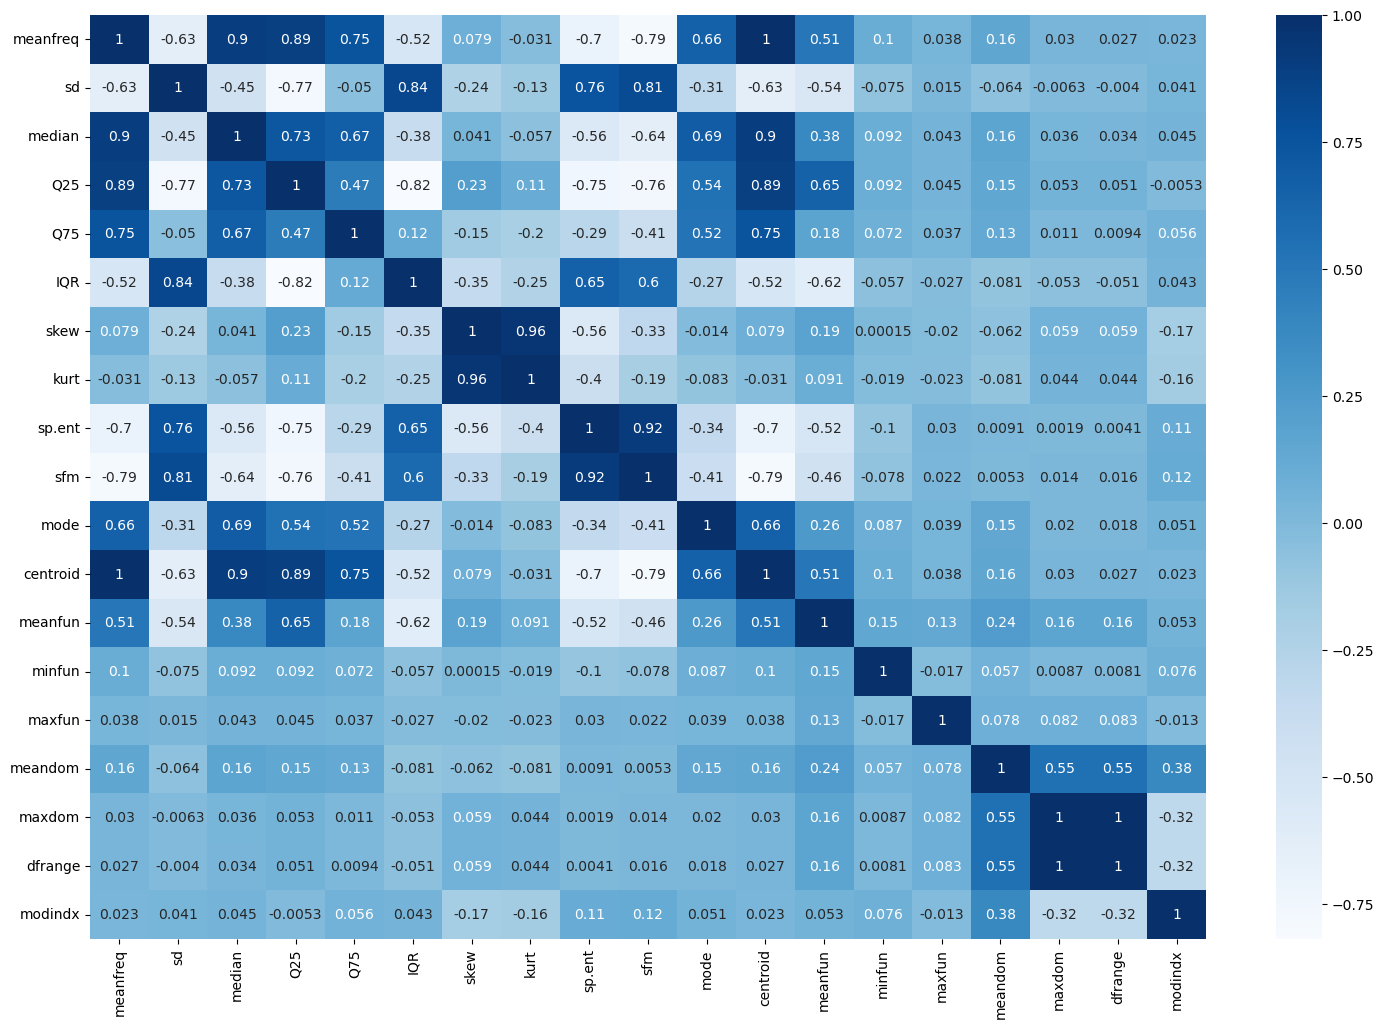

In [8]:
plt.figure(figsize = (18,12))
sns.heatmap(df_gender.drop(['label'], axis =1).corr(), annot = True, cmap = 'Blues')

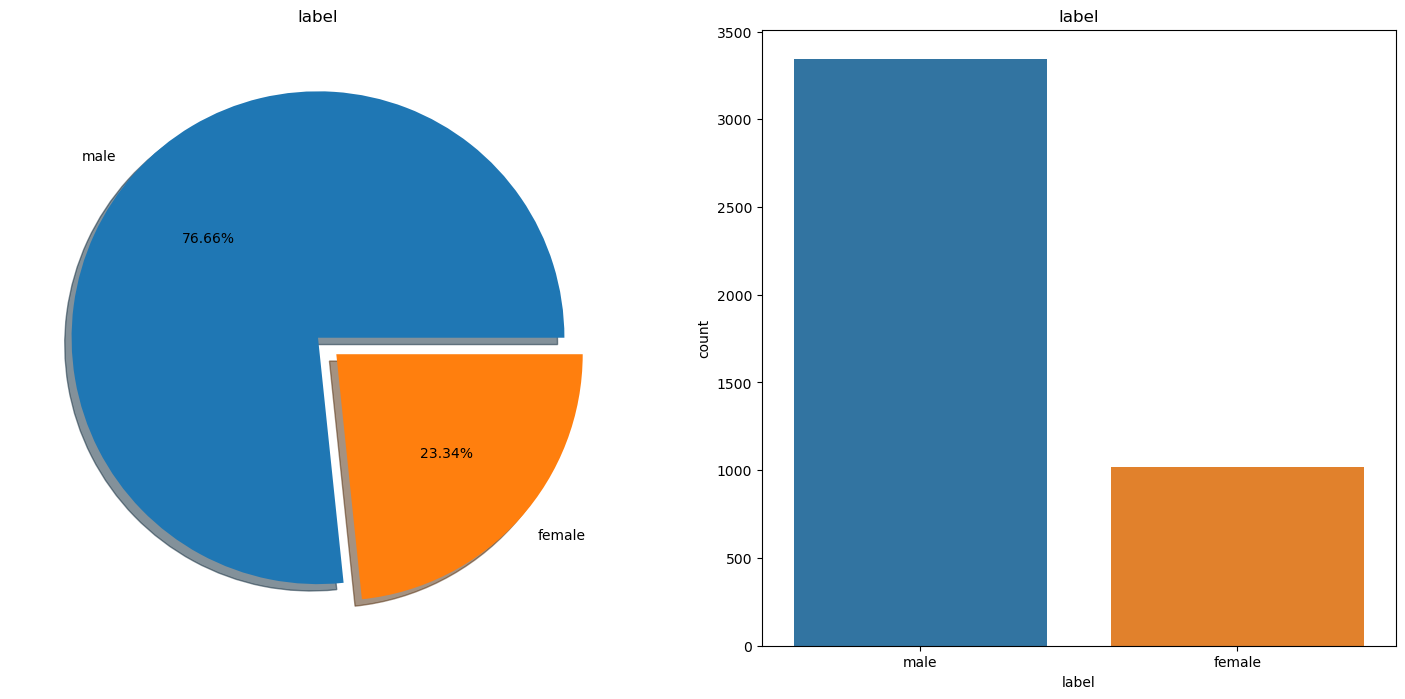

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plotting pie chart for 'Exited' column
df_gender['label'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')

# Plotting countplot for 'Exited' column
sns.countplot(x='label', data=df_gender, ax=ax[1])
ax[1].set_title('label')

plt.show()  # Display the figure

Text(0.5, 0.98, 'Histogram of Objective Value')

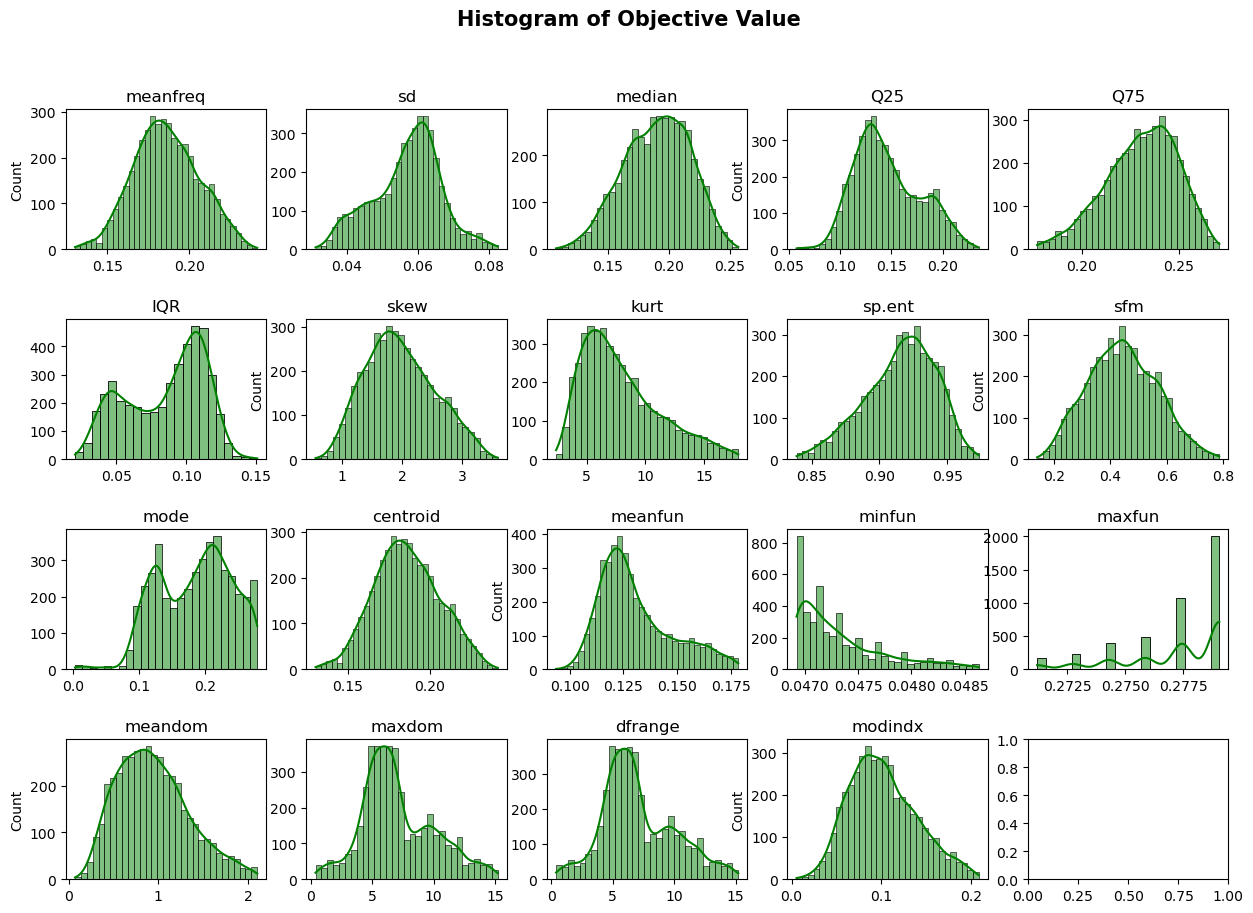

In [10]:
categorial = df_gender.columns.drop(['label'])
fig,ax = plt.subplots(ncols = 5, nrows = 4,
                     figsize = (15,10))
fig.subplots_adjust(hspace = 0.5)
ax = ax.flatten()

for i,col in enumerate(categorial):
    
    sns.histplot(data = df_gender,
                x = col,
                kde = True,
                color = 'green',
                ax = ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    
    if i % 3 != 0:
        ax[i].set_ylabel('')
        
fig.suptitle('Histogram of Objective Value', fontsize = 15, weight = 'bold')

In [11]:
df_gender['label'].unique()

array(['male', 'female'], dtype=object)

In [12]:
X = df_gender.drop(['label'], axis = 1)
y = df_gender['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = 0.8)

In [14]:
model_LC = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
model_LC, prediction = model_LC.fit(X_train, X_test, y_train, y_test)
print(model_LC)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:06<00:00,  4.47it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.94               0.92    None      0.94   
SVC                                0.93               0.90    None      0.93   
LinearDiscriminantAnalysis         0.93               0.90    None      0.93   
ExtraTreesClassifier               0.93               0.90    None      0.93   
RandomForestClassifier             0.92               0.90    None      0.92   
LinearSVC                          0.93               0.90    None      0.93   
CalibratedClassifierCV             0.93               0.89    None      0.93   
RidgeClassifier                    0.93               0.89    None      0.93   
LogisticRegression                 0.93               0.89    None      0.93   
AdaBoostClassifier                 0.91               0.89    None      0.92   
RidgeClassifierCV                  0.92 

In [15]:
def accuracy(n):
    LC = LGBMClassifier(n_estimators=n)
    model_LC = LC.fit(X_train, y_train)
    predictions_LC = model_LC.predict(X_test)
    return accuracy_score(y_test, predictions_LC)

In [16]:
N = [i for i in range (100, 5100, 100)]
Accuracy = [accuracy(i) for i in range(100,5100,100)]

In [17]:
pd.set_option('display.float_format', '{:.16f}'.format)
result_N_estimators = pd.DataFrame({'N' : N, 'Accuracy' : Accuracy})
result_N_estimators

,N,Accuracy
0,100,0.9369988545246277
1,200,0.9381443298969072
2,300,0.9392898052691867
3,400,0.9392898052691867
4,500,0.9381443298969072
5,600,0.9392898052691867
6,700,0.9392898052691867
7,800,0.9392898052691867
8,900,0.9404352806414662
9,1000,0.9404352806414662


In [18]:
LC = LGBMClassifier(n_estimators=5000)
model_LC = LC.fit(X_train, y_train)

In [19]:
predictions_LC = model_LC.predict(X_test)

In [20]:
accuracy_score(y_test, predictions_LC)

0.9427262313860252

In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(classification_report(predictions_LC, y_test))

              precision    recall  f1-score   support

      female       0.90      0.85      0.88       210
        male       0.95      0.97      0.96       663

    accuracy                           0.94       873
   macro avg       0.93      0.91      0.92       873
weighted avg       0.94      0.94      0.94       873



In [22]:
def data_predict(n):
    return pd.DataFrame({'Data' : df_gender['label'].values[:n], 'Predict' : model_LC.predict(df_gender.iloc[:,:-1])[:n]})

In [23]:
data_predict(30)

,Data,Predict
0,male,male
1,male,male
2,male,male
3,male,male
4,male,male
5,male,male
6,male,male
7,male,male
8,male,male
9,male,male
